**App User Segmentation**

In this project, we aim to segment app users based on their behavior and spending patterns. By analyzing features such as average screen time, spending habits, reviews, ratings, and last activity, we can identify distinct user groups. This segmentation helps businesses understand which users are more likely to stay engaged and which ones are at risk of uninstalling the application, ultimately enabling better retention strategies.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


**Data Import**

In [ ]:
df = pd.read_csv("userbehaviour.csv")

In [ ]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


**EDA (Exploratory Data Analysis)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


In [ ]:
df.isnull().sum()

,0
userid,0
Average Screen Time,0
Average Spent on App (INR),0
Left Review,0
Ratings,0
New Password Request,0
Last Visited Minutes,0
Status,0


In [ ]:
df["Status"].value_counts()

,count
Status,
Installed,916
Uninstalled,83


**Data Visualization**

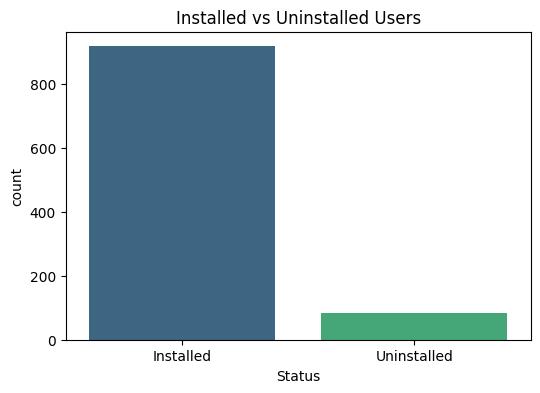

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Status", data=df, palette="viridis")
plt.title("Installed vs Uninstalled Users")
plt.show()

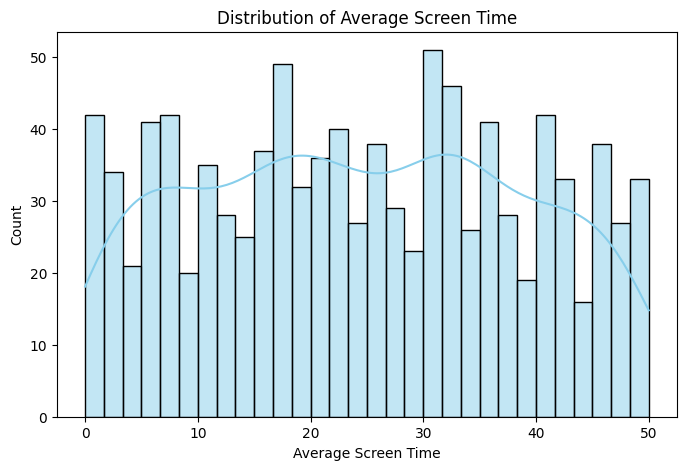

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Average Screen Time"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Average Screen Time")
plt.show()

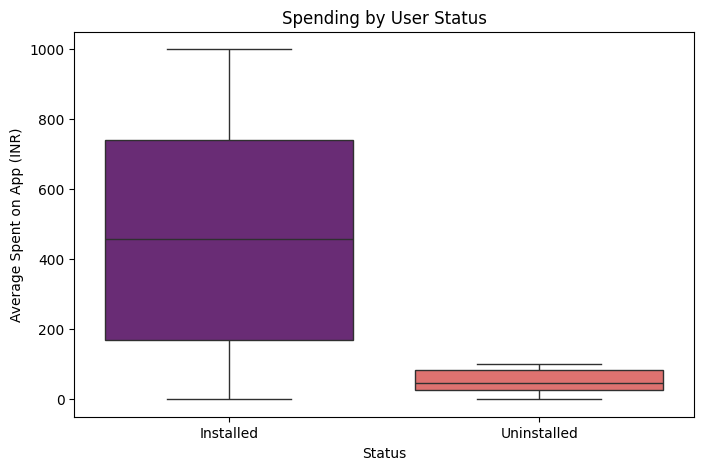

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Status", y="Average Spent on App (INR)", data=df, palette="magma")
plt.title("Spending by User Status")
plt.show()

In [ ]:


figure = px.scatter(data_frame=df,
                    x="Average Screen Time",
                    y="Ratings",
                    size="Ratings",
                    color="Status",
                    title="Relationship Between Ratings and Screen Time",
                    trendline="ols")
figure.show()


In [ ]:


features = ["Average Screen Time", "Average Spent on App (INR)", "Ratings", "Last Visited Minutes"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)


In [ ]:

PLOT = go.Figure()

PLOT.add_trace(go.Scatter(
    x=df["Average Screen Time"],
    y=df["Average Spent on App (INR)"],
    mode="markers",
    marker=dict(
        size=10,
        color=df["cluster"],
        colorscale="Viridis",
        showscale=True
    ),
    text=df["Status"]
))

PLOT.update_layout(
    title="App Users Segments",
    xaxis_title="Average Screen Time",
    yaxis_title="Average Spent on App (INR)"
)

PLOT.show()

**Modeling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features = ["Average Screen Time", "Average Spent on App (INR)", "Ratings", "Last Visited Minutes"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_score = -1
best_k = 0

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans

df["cluster"] = best_model.labels_

best_score, best_k


(np.float64(0.501160417791042), 2)

In [ ]:
import pickle

features = ["Average Screen Time", "Average Spent on App (INR)", "Ratings", "Last Visited Minutes"]
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_model = KMeans(n_clusters=2, random_state=42)
best_model.fit(X_scaled)

df["cluster"] = best_model.labels_

pickle.dump(best_model, open("app_users_kmeans.pkl", "wb"))


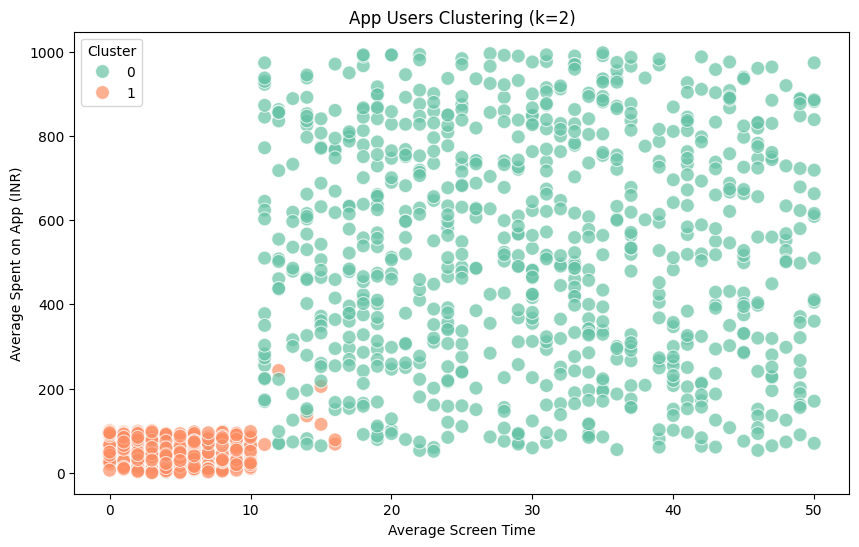

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df["Average Screen Time"],
    y=df["Average Spent on App (INR)"],
    hue=df["cluster"],
    palette="Set2",
    s=100,
    alpha=0.7)
plt.title("App Users Clustering (k=2)")
plt.xlabel("Average Screen Time")
plt.ylabel("Average Spent on App (INR)")
plt.legend(title="Cluster")
plt.show()

**Conclusion**

The clustering model successfully segmented app users into 2 distinct groups based on usage and spending behavior. The silhouette score of 0.50 indicates that the clusters are moderately well-separated. This segmentation can help app developers identify high-engagement users versus low-engagement users and create targeted strategies to retain and increase user activity.